# Import

In [1]:
# Basic
import pandas as pd
import numpy as np
import warnings

warnings.simplefilter('ignore')

# ML Toolkit
from robusta.selector import *
from robusta.crossval import *
from robusta.pipeline import *
from robusta.preprocessing import *

from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.metrics import *

# Model
from sklearn.linear_model import Ridge

# Plot
from jupyterthemes import jtplot
import matplotlib

jtplot.style('gruvboxd')
matplotlib.use('nbagg')

Using TensorFlow backend.


# Data

In [2]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=100, n_features=20, n_informative=5, 
                       random_state=666)

X = pd.DataFrame(X)
y = pd.Series(y)

X.rename(columns=lambda x: 'x{}'.format(x), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
y

0      26.101745
1     -42.616486
2     -46.321013
3     100.987270
4      29.119044
         ...    
95    215.936404
96    272.505488
97     -9.940659
98    127.823394
99     48.658169
Length: 100, dtype: float64

# Task & Model

In [4]:
get_score = lambda y_true, y_pred: -mean_squared_error(y_true, y_pred)
scoring = 'neg_mean_squared_error'

#cv = 5
cv = 2

model = Ridge()

# Baseline

In [5]:
features = X_train.columns

_, y_pred = crossval_predict(model, cv, X_train[features], y_train, X_new=X_test[features],
                             scoring=scoring, verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[03:56:57]  Ridge

[03:56:57]  FOLD  0:   -40.8234
[03:56:57]  FOLD  1:   -129.1511

[03:56:57]  AVERAGE:   -84.9872 ± 44.1638



-30.08859922513521

# Selector

## Greed Selector

In [6]:
selector = GreedSelector(model, cv, scoring, n_jobs=-1, 
                         floating=True, forward=True)
selector.fit(X_train, y_train)

features = selector.get_features()

[03:56:59] STEP FORWARD
[03:56:59] ITER: 1      SUBSET: 1/20      SCORE: -17805.2765 ± 664.7695
[03:57:00] ITER: 2      SUBSET: 1/20      SCORE: -12064.4517 ± 1522.9680
[03:57:00] ITER: 3      SUBSET: 1/20      SCORE: -16880.5956 ± 83.7783
[03:57:00] ITER: 4      SUBSET: 1/20      SCORE: -19131.2919 ± 192.4303
[03:57:00] ITER: 5      SUBSET: 1/20      SCORE: -16419.6899 ± 278.4364
[03:57:00] ITER: 6      SUBSET: 1/20      SCORE: -15120.1259 ± 1925.0150
[03:57:00] ITER: 7      SUBSET: 1/20      SCORE: -16626.9959 ± 95.7220
[03:57:00] ITER: 8      SUBSET: 1/20      SCORE: -19132.8641 ± 510.2989
[03:57:01] ITER: 9      SUBSET: 1/20      SCORE: -14673.8822 ± 2522.1625
[03:57:01] ITER: 10      SUBSET: 1/20      SCORE: -17130.7036 ± 97.7289
[03:57:01] ITER: 11      SUBSET: 1/20      SCORE: -16716.6920 ± 208.4450
[03:57:01] ITER: 12      SUBSET: 1/20      SCORE: -16777.9322 ± 757.1703
[03:57:01] ITER: 13      SUBSET: 1/20      SCORE: -16841.2863 ± 8.8493
[03:57:01] ITER: 14      SUBSET: 1/20 

[03:57:14] ITER: 110      SUBSET: 6/20      SCORE: -20.9219 ± 5.1472
[03:57:14] ITER: 111      SUBSET: 6/20      SCORE: -20.4364 ± 4.4125
[03:57:14] STEP BACKWARD
[03:57:14] ITER: 112      SUBSET: 5/20      SCORE: -10323.1764 ± 528.1799
[03:57:14] ITER: 113      SUBSET: 5/20      SCORE: -2806.6772 ± 544.2345
[03:57:14] ITER: 114      SUBSET: 5/20      SCORE: -4645.0231 ± 358.4407
[03:57:14] ITER: 115      SUBSET: 5/20      SCORE: -4707.4306 ± 85.1981
[03:57:15] STEP FORWARD
[03:57:15] ITER: 116      SUBSET: 7/20      SCORE: -19.6928 ± 3.9234
[03:57:15] ITER: 117      SUBSET: 7/20      SCORE: -22.6888 ± 2.2706
[03:57:15] ITER: 118      SUBSET: 7/20      SCORE: -20.8347 ± 5.1217
[03:57:15] ITER: 119      SUBSET: 7/20      SCORE: -20.6976 ± 3.6034
[03:57:15] ITER: 120      SUBSET: 7/20      SCORE: -20.3695 ± 3.3053
[03:57:15] ITER: 121      SUBSET: 7/20      SCORE: -19.9445 ± 4.1531
[03:57:15] ITER: 122      SUBSET: 7/20      SCORE: -19.9209 ± 4.4309
[03:57:16] ITER: 123      SUBSET: 7/20

[03:57:29] ITER: 224      SUBSET: 10/20      SCORE: -22.4527 ± 4.4455
[03:57:29] ITER: 225      SUBSET: 10/20      SCORE: -24.9065 ± 1.9333
[03:57:29] ITER: 226      SUBSET: 10/20      SCORE: -21.6252 ± 5.7569
[03:57:29] ITER: 227      SUBSET: 10/20      SCORE: -20.9870 ± 4.8388


In [7]:
_, y_pred = crossval_predict(model, cv, X_train[features], y_train, 
                             X_new=X_test[features], scoring=scoring, 
                             verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[03:57:29]  Ridge

[03:57:29]  FOLD  0:   -15.5932
[03:57:29]  FOLD  1:   -23.6035

[03:57:29]  AVERAGE:   -19.5984 ± 4.0051



-8.011058288705494

<IPython.core.display.Javascript object>


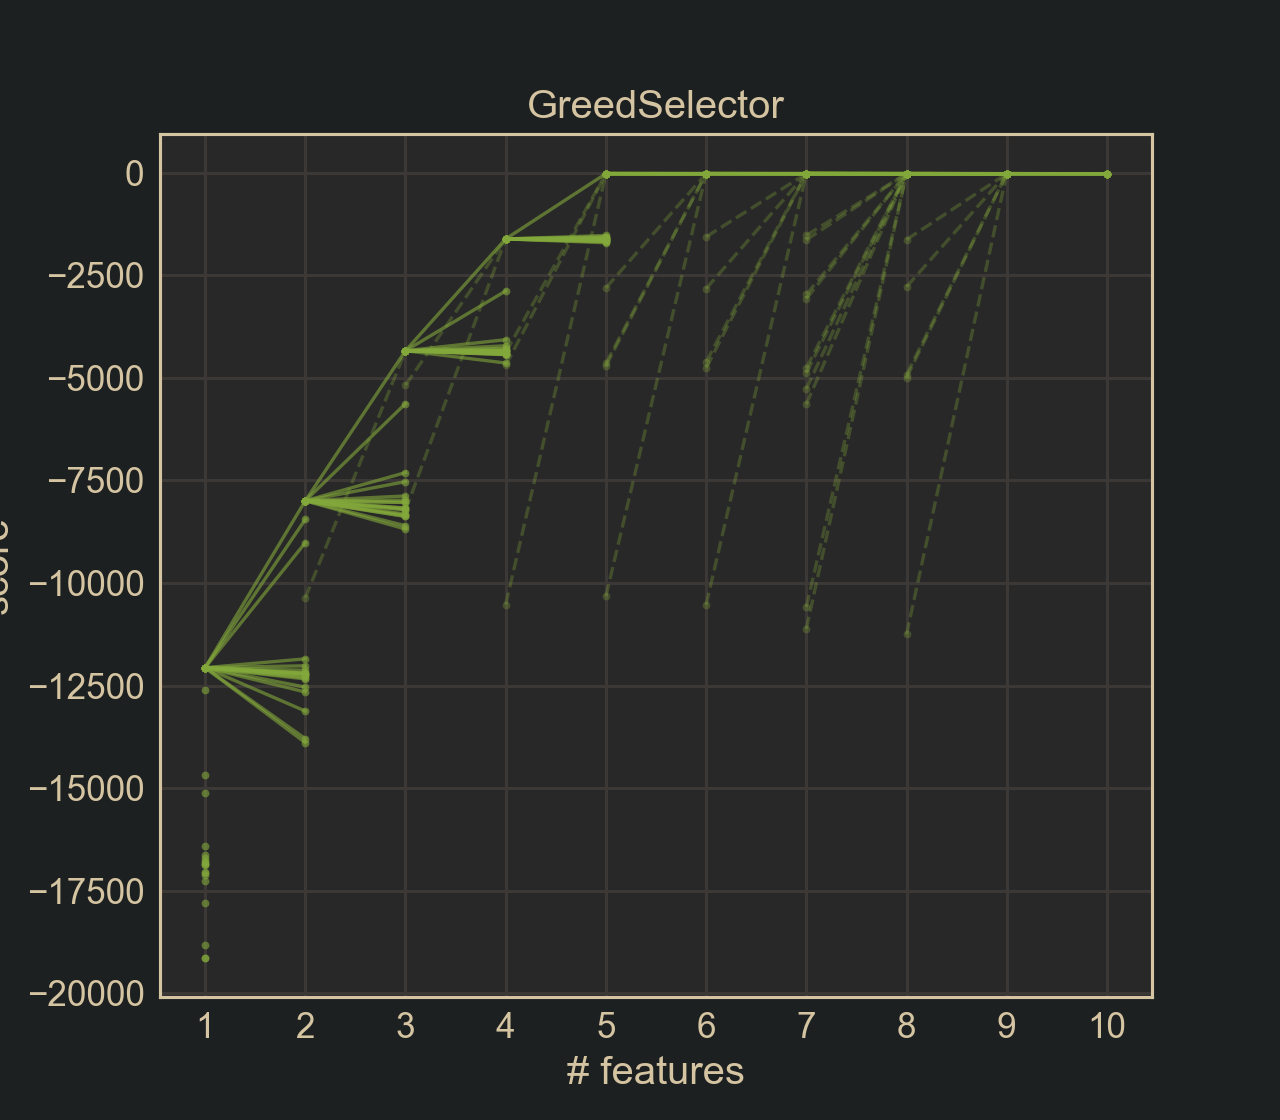

In [8]:
%matplotlib notebook

selector.plot_progress()

## RFE

In [28]:
selector = RFE(model, cv, scoring, min_features=5, n_jobs=-1)
selector.fit(X_train, y_train)

features = selector.get_features()

[03:59:43] ITER: 1/16      SUBSET: 20/20      SCORE: -84.9872 ± 44.1638      ETA: 1 sec
[03:59:43] ITER: 2/16      SUBSET: 19/20      SCORE: -82.5163 ± 41.8001      ETA: 1 sec
[03:59:43] ITER: 3/16      SUBSET: 18/20      SCORE: -80.5939 ± 40.2342      ETA: 1 sec
[03:59:43] ITER: 4/16      SUBSET: 17/20      SCORE: -79.5484 ± 40.3744      ETA: 1 sec
[03:59:43] ITER: 5/16      SUBSET: 16/20      SCORE: -72.0471 ± 35.8151      ETA: 1 sec
[03:59:43] ITER: 6/16      SUBSET: 15/20      SCORE: -58.6183 ± 22.4012      ETA: 1 sec
[03:59:43] ITER: 7/16      SUBSET: 14/20      SCORE: -56.1694 ± 18.8731      ETA: 960 ms
[03:59:43] ITER: 8/16      SUBSET: 13/20      SCORE: -50.5469 ± 16.1165      ETA: 853 ms
[03:59:44] ITER: 9/16      SUBSET: 12/20      SCORE: -45.5069 ± 13.9536      ETA: 747 ms
[03:59:44] ITER: 10/16      SUBSET: 11/20      SCORE: -39.4101 ± 8.0139      ETA: 640 ms
[03:59:44] ITER: 11/16      SUBSET: 10/20      SCORE: -35.4035 ± 7.7831      ETA: 533 ms
[03:59:44] ITER: 12/16     

In [29]:
_, y_pred = crossval_predict(model, cv, X_train[features], y_train, 
                             X_new=X_test[features], scoring=scoring, 
                             verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[03:59:46]  Ridge

[03:59:46]  FOLD  0:   -15.3997
[03:59:46]  FOLD  1:   -23.8559

[03:59:46]  AVERAGE:   -19.6278 ± 4.2281



-6.3368805812557785

<IPython.core.display.Javascript object>


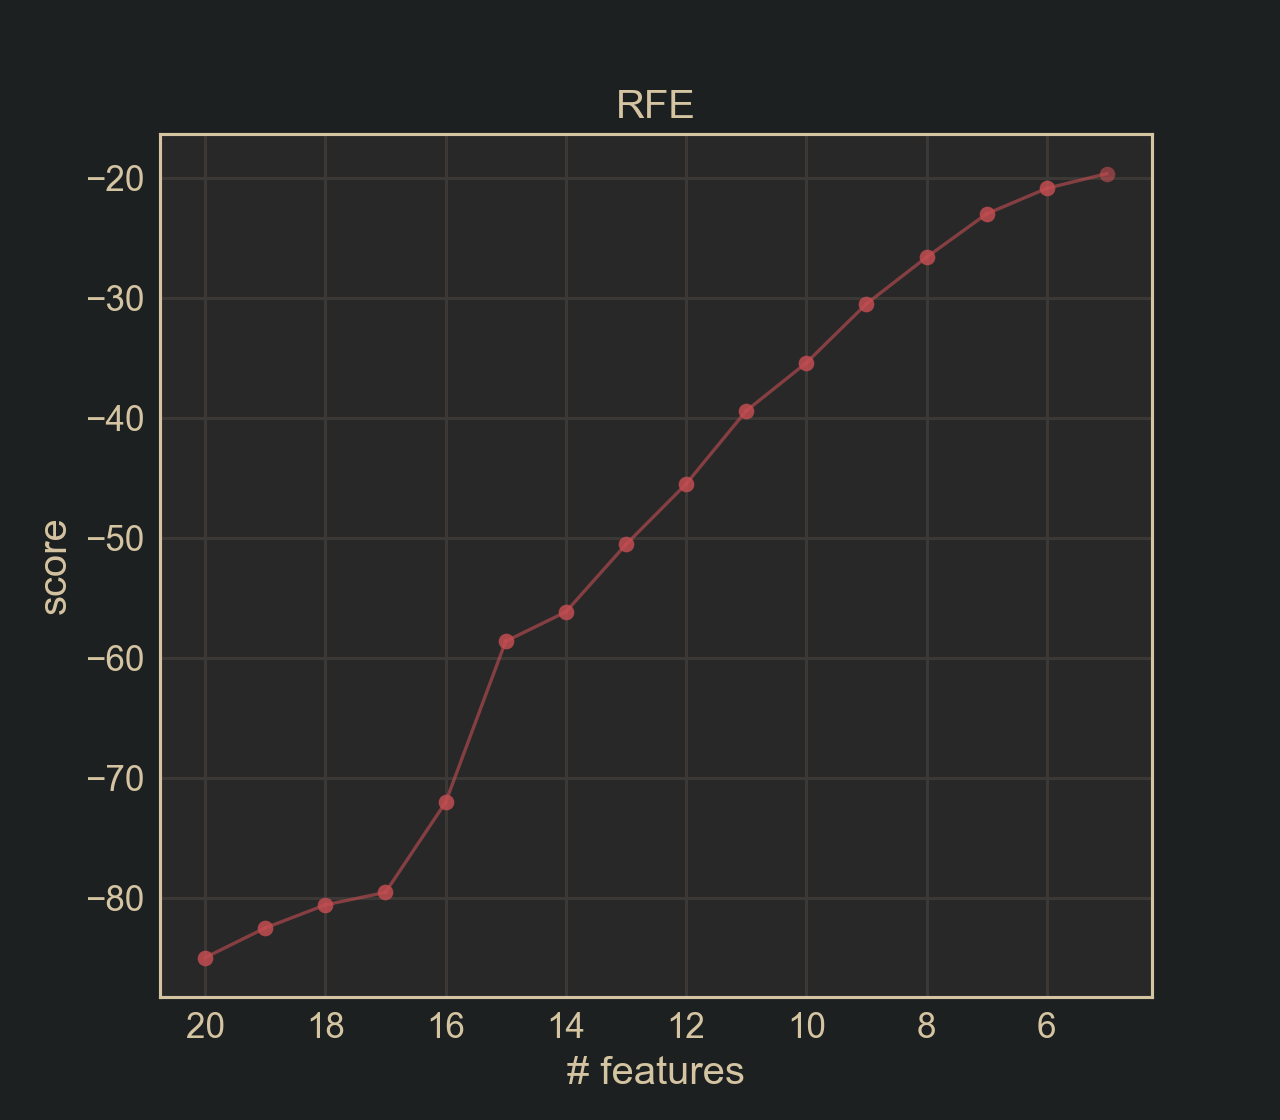

In [30]:
%matplotlib notebook

selector.plot_progress(marker='o', color='r')

## Random Subset

In [31]:
selector = RandomSubset(model, cv, scoring, n_jobs=-1, max_iter=300, max_time=10)
selector.fit(X_train, y_train)

features = selector.get_features()

[03:59:54] ITER: 1/300      SUBSET: 14/20      SCORE: -4582.3962 ± 753.9533      ETA: 9 sec
[03:59:54] ITER: 2/300      SUBSET: 13/20      SCORE: -18790.9135 ± 1505.1360      ETA: 9 sec
[03:59:55] ITER: 3/300      SUBSET: 18/20      SCORE: -55.7190 ± 17.1334      ETA: 9 sec
[03:59:55] ITER: 4/300      SUBSET: 16/20      SCORE: -1862.6434 ± 111.7222      ETA: 9 sec
[03:59:55] ITER: 5/300      SUBSET: 15/20      SCORE: -45.3729 ± 16.8745      ETA: 9 sec
[03:59:55] ITER: 6/300      SUBSET: 18/20      SCORE: -72.2918 ± 35.2165      ETA: 9 sec
[03:59:55] ITER: 7/300      SUBSET: 11/20      SCORE: -13064.0577 ± 2629.7301      ETA: 9 sec
[03:59:55] ITER: 8/300      SUBSET: 14/20      SCORE: -45.2051 ± 12.4349      ETA: 9 sec
[03:59:55] ITER: 9/300      SUBSET: 14/20      SCORE: -36.2656 ± 3.9671      ETA: 9 sec
[03:59:55] ITER: 10/300      SUBSET: 14/20      SCORE: -15418.7347 ± 2448.0495      ETA: 8 sec
[03:59:56] ITER: 11/300      SUBSET: 13/20      SCORE: -11566.4104 ± 1564.7390      ETA: 

[04:00:05] ITER: 88/300      SUBSET: 16/20      SCORE: -11892.2649 ± 993.7455      ETA: 562 ms
[04:00:06] ITER: 89/300      SUBSET: 18/20      SCORE: -13392.4650 ± 3710.6563      ETA: 457 ms
[04:00:06] ITER: 90/300      SUBSET: 18/20      SCORE: -72.6388 ± 34.4406      ETA: 350 ms
[04:00:06] ITER: 91/300      SUBSET: 17/20      SCORE: -56.1815 ± 25.2836      ETA: 240 ms
[04:00:06] ITER: 92/300      SUBSET: 12/20      SCORE: -9559.5426 ± 369.2754      ETA: 135 ms
[04:00:06] ITER: 93/300      SUBSET: 12/20      SCORE: -6339.1207 ± 544.5217      ETA: 27 ms
[04:00:06] ITER: 94/300      SUBSET: 18/20      SCORE: -2238.0742 ± 462.5748      ETA: 0 ms
Time limit exceed!


In [32]:
_, y_pred = crossval_predict(model, cv, X_train[features], y_train, 
                             X_new=X_test[features], scoring=scoring, 
                             verbose=2, n_jobs=None)

get_score(y_test, y_pred)

[04:00:11]  Ridge

[04:00:11]  FOLD  0:   -22.8795
[04:00:11]  FOLD  1:   -34.8066

[04:00:11]  AVERAGE:   -28.8431 ± 5.9636



-13.570625976515506

<IPython.core.display.Javascript object>


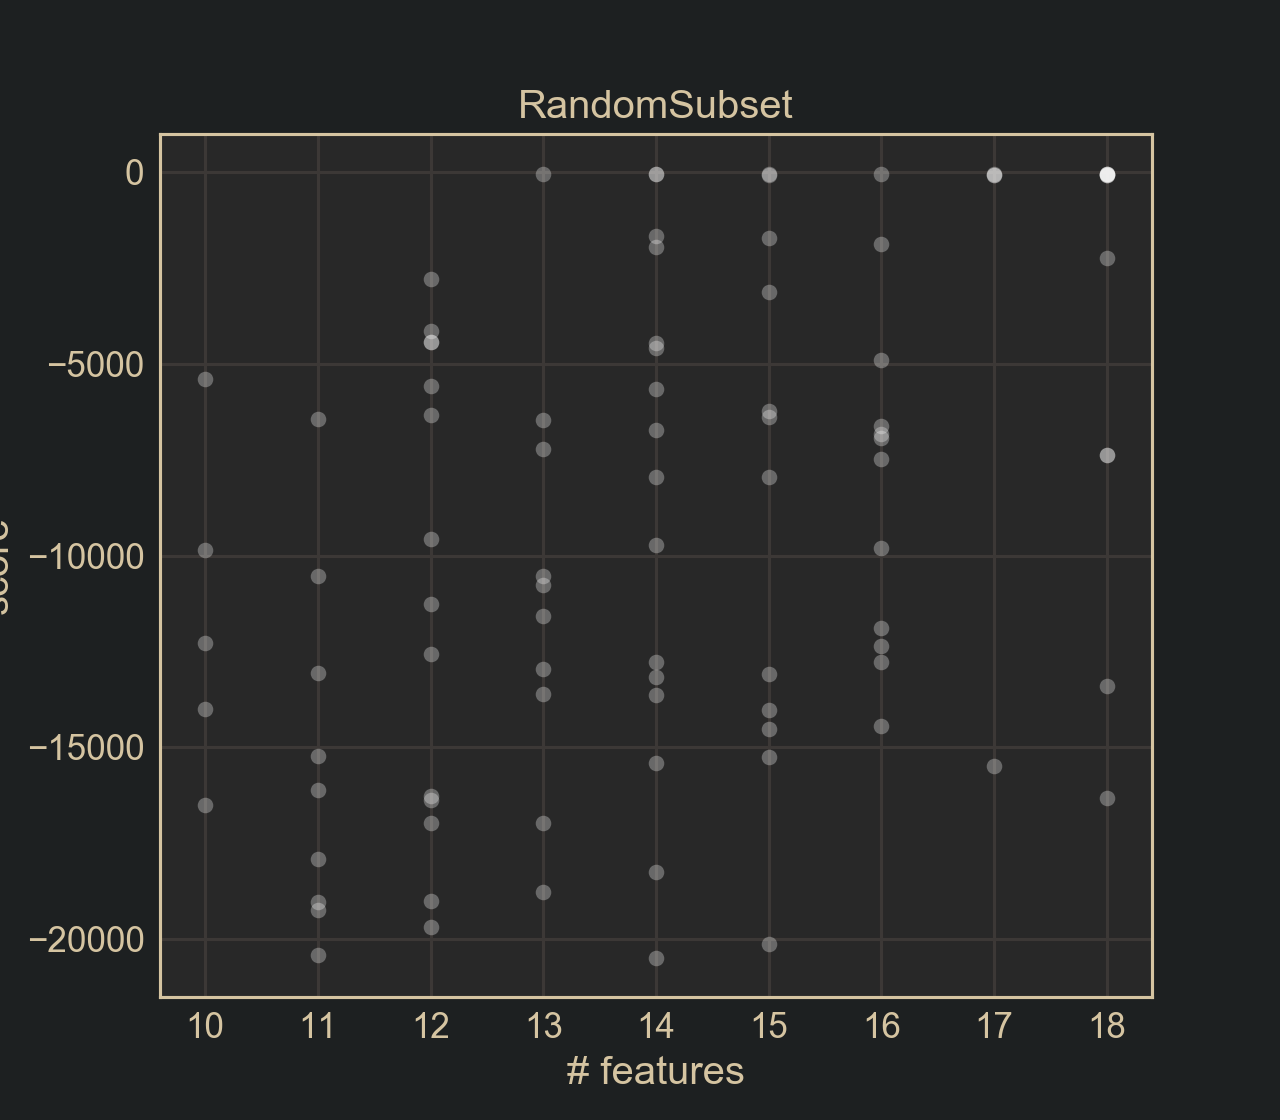

In [35]:
%matplotlib notebook

selector.plot_progress(marker='o', alpha=0.3, color='w')